# Importing libraries

In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [167]:
from google.colab import files
files.upload()

In [14]:
df=pd.read_csv("./insurance.csv")

# Information of dataset

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Preprocessing

Let's see which values are categorical or regressive

In [17]:
for i in df.columns:
    if len(df[i].value_counts()) < 10:
        print("-"*40)
        print(df[i].value_counts())

----------------------------------------
male      676
female    662
Name: sex, dtype: int64
----------------------------------------
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
----------------------------------------
no     1064
yes     274
Name: smoker, dtype: int64
----------------------------------------
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [ ]:
encode=LabelEncoder()

In [30]:
df["sex"]=encode.fit_transform(df["sex"])
print(encode.classes_)
df["smoker"]=encode.fit_transform(df["smoker"])
print(encode.classes_)
df["region"]=encode.fit_transform(df["region"])
print(encode.classes_)

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']


In [31]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


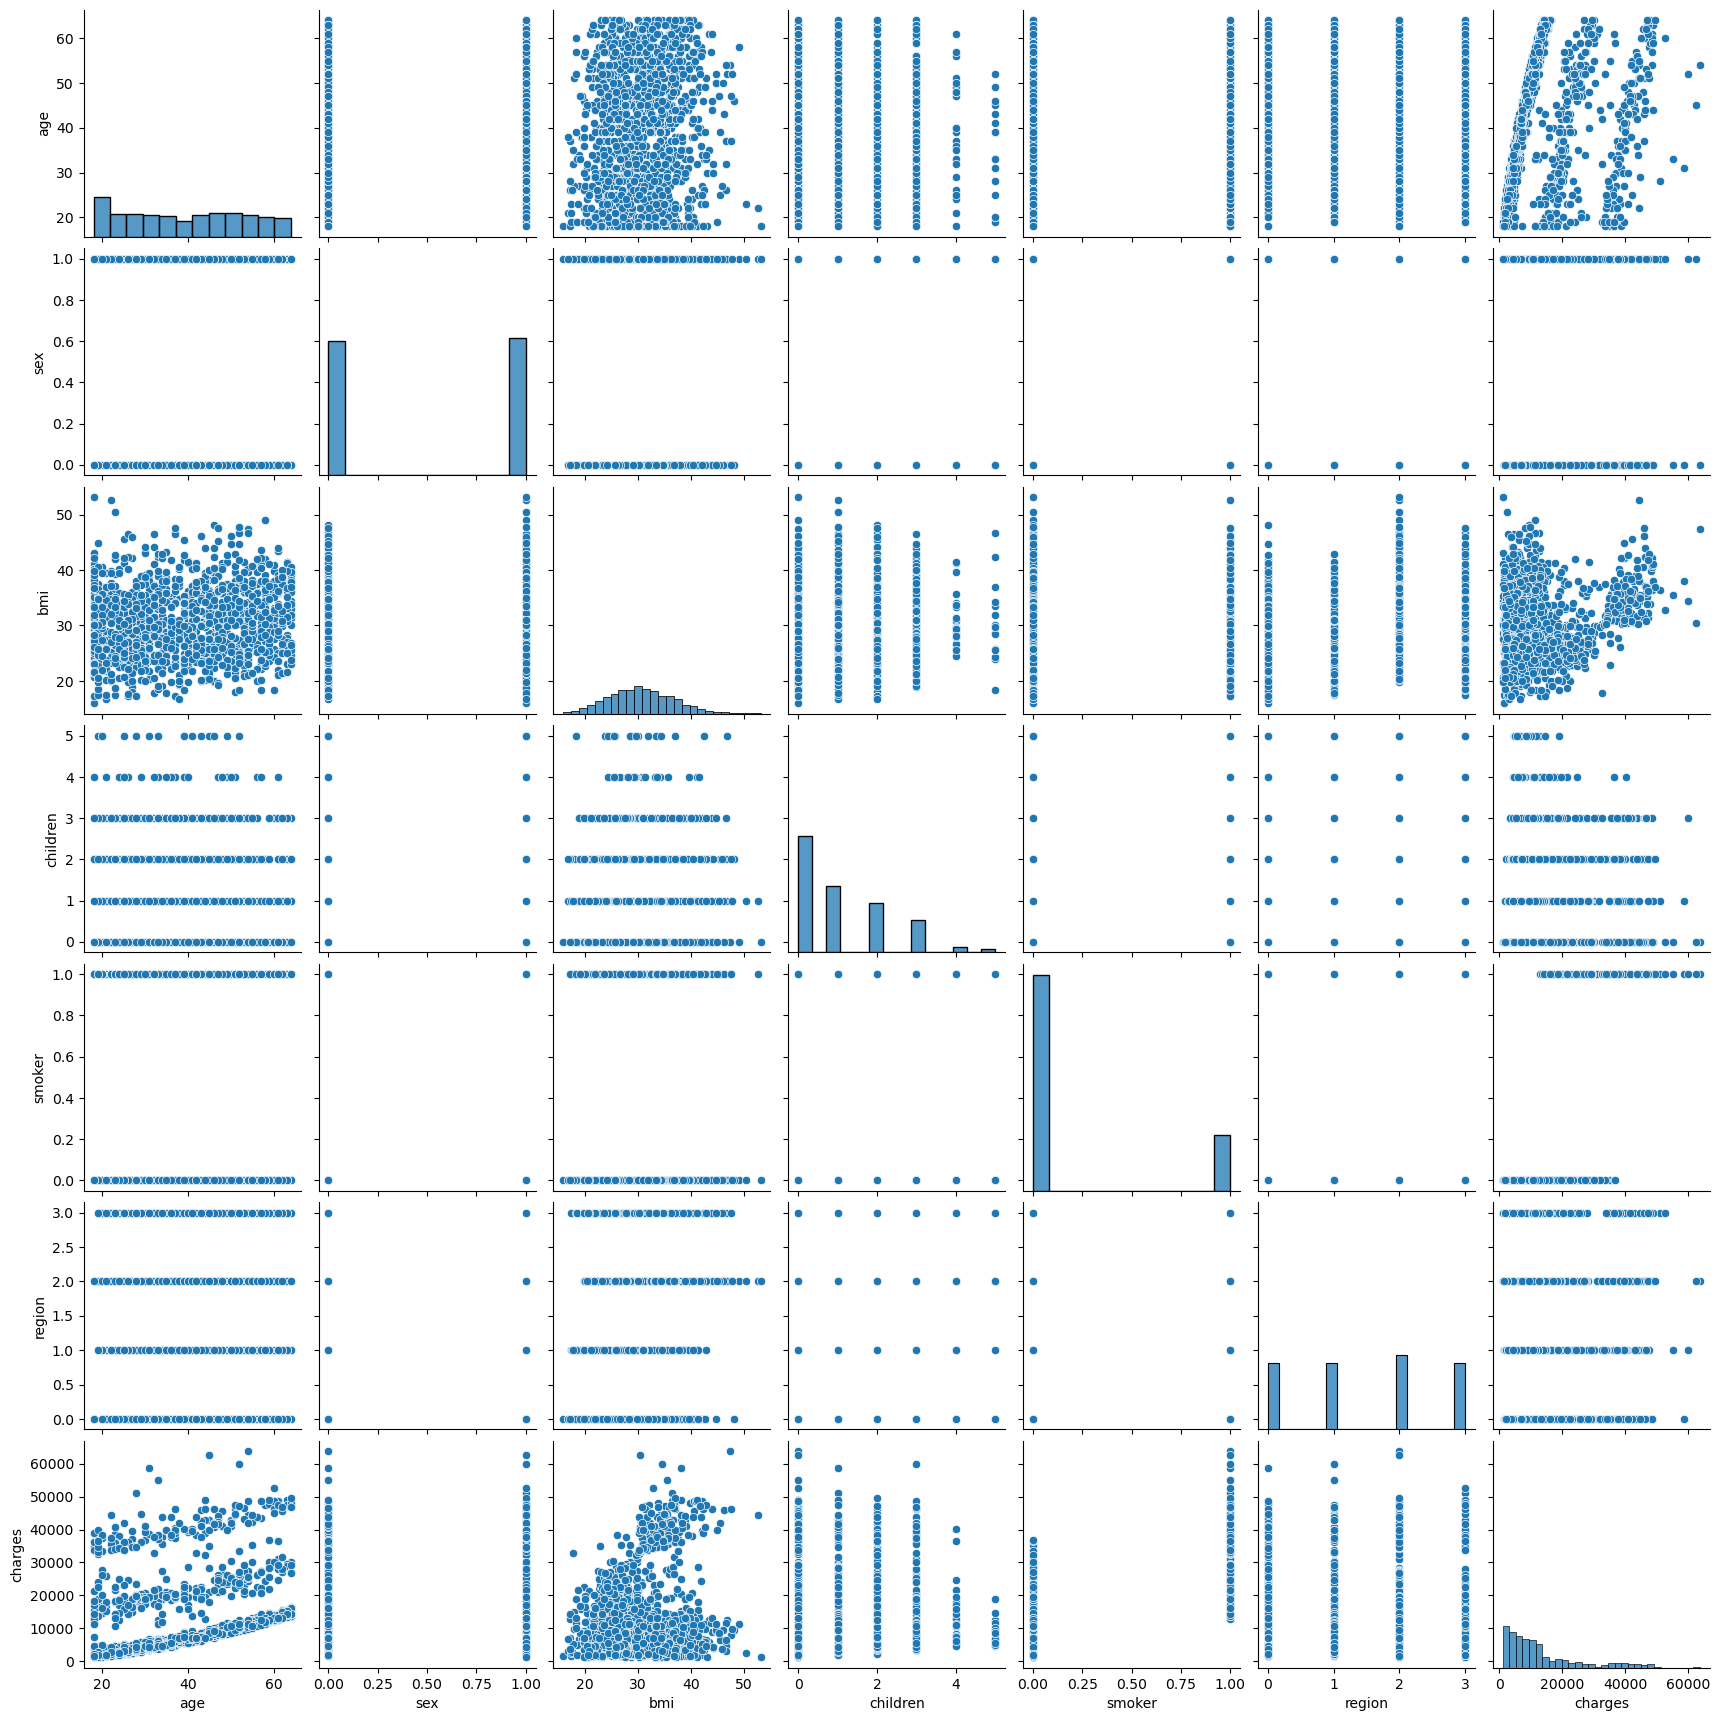

In [32]:
sns.pairplot(df, palette="rainbow")

In [75]:
average_charge_respected_to_age = df.groupby("age")["charges"].mean()
min_charge_respected_to_age = df.groupby("age")["charges"].min()
max_charge_respected_to_age = df.groupby("age")["charges"].max()

<Figure size 640x480 with 0 Axes>

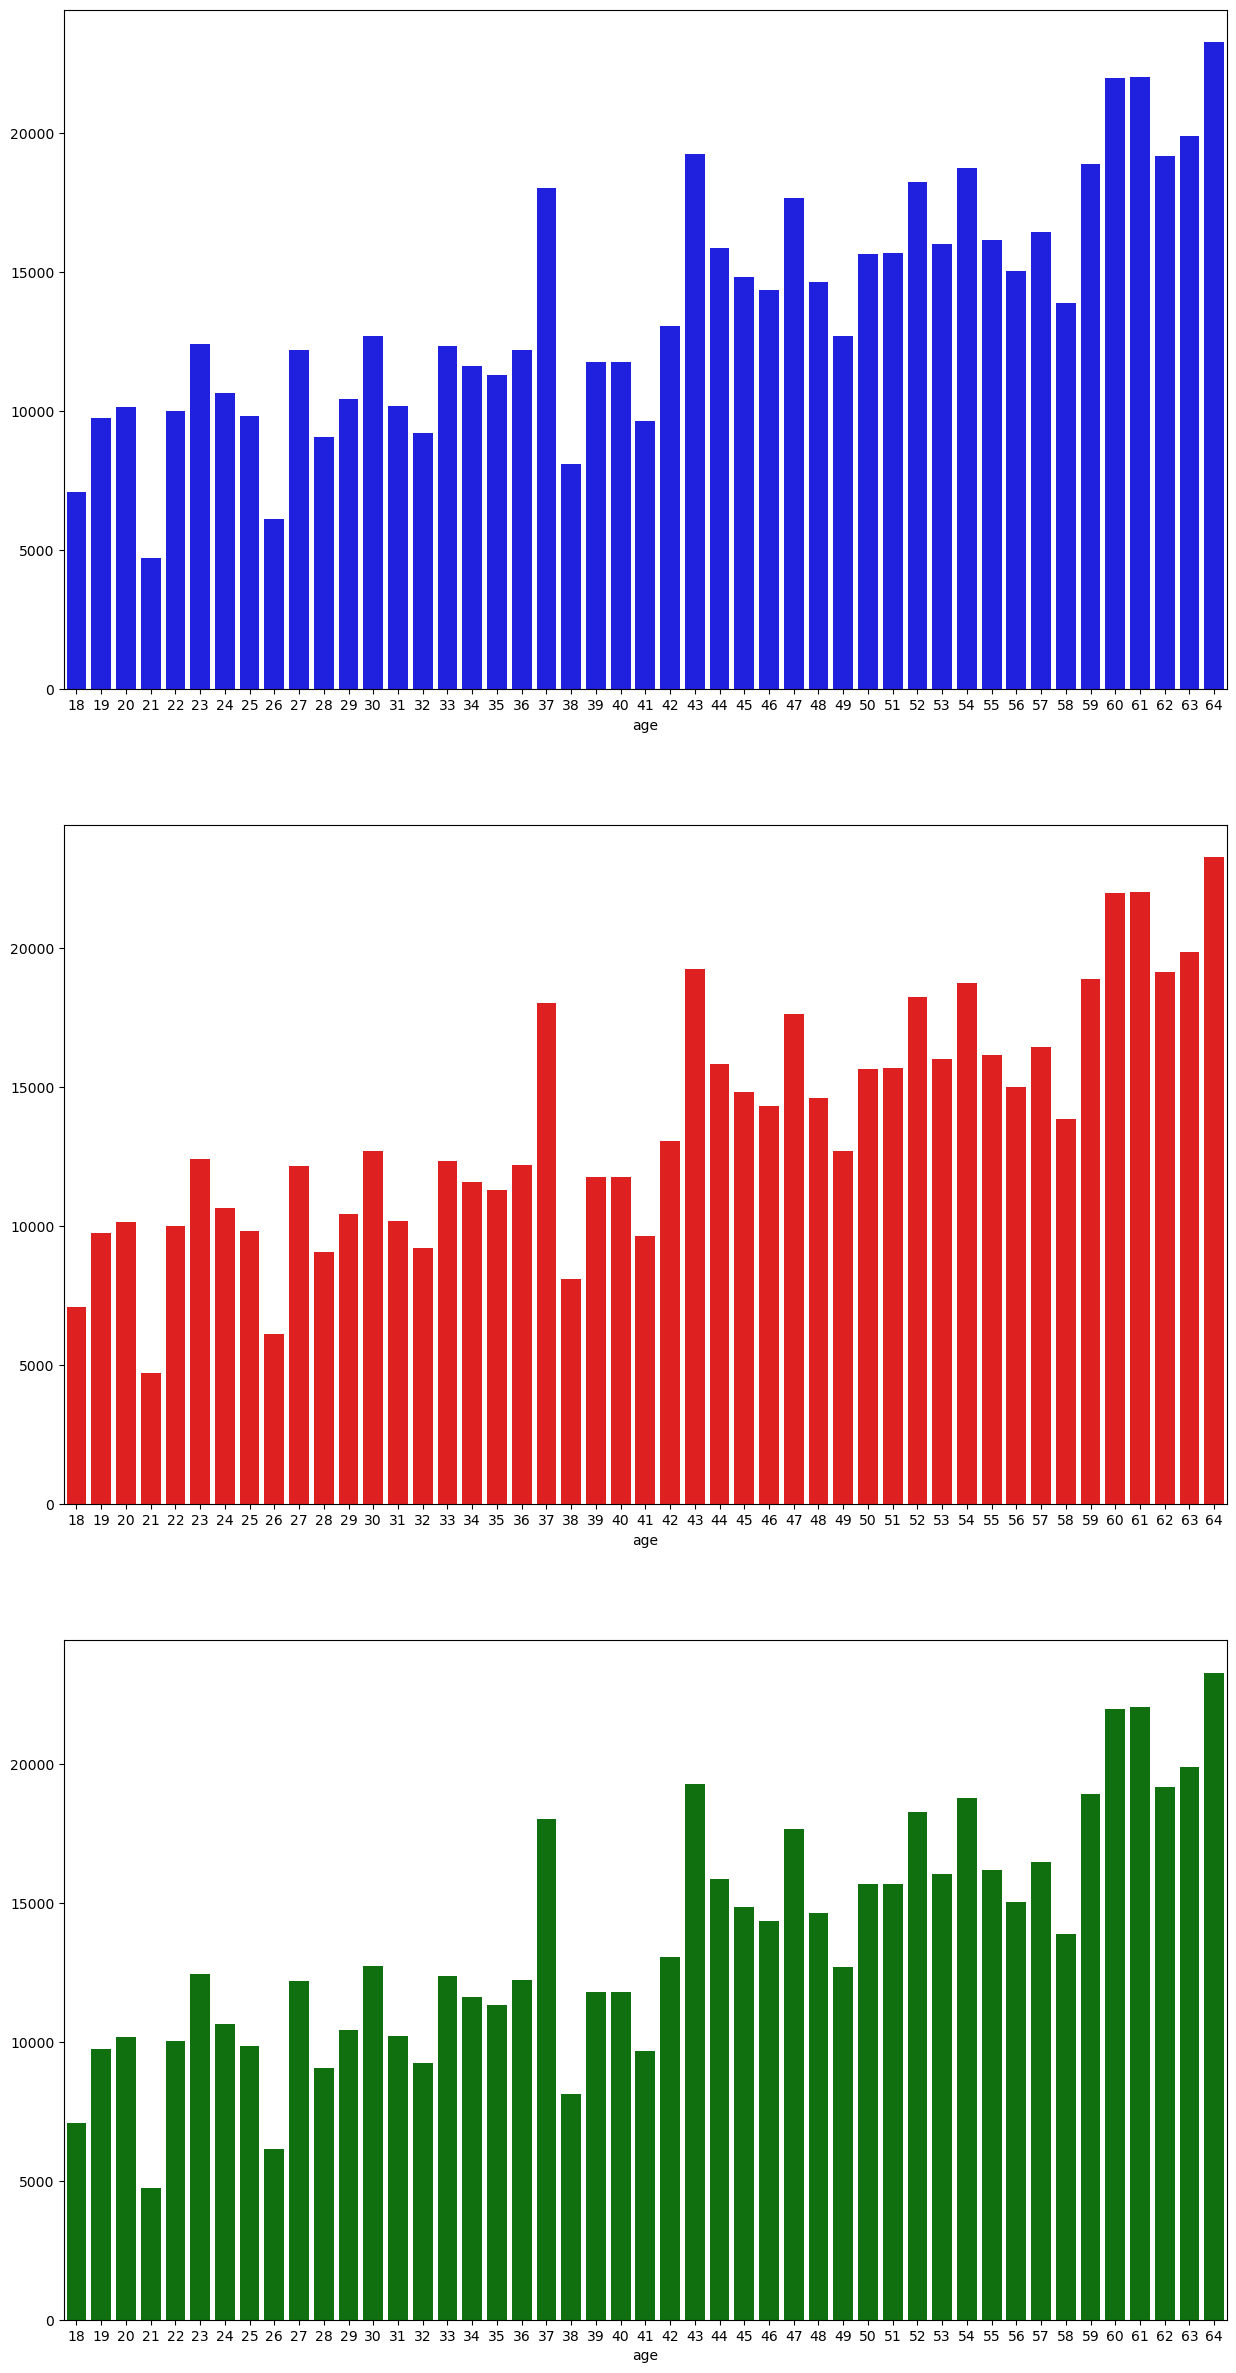

In [79]:
plt.figure(figsize=(15,30))
plt.subplot(3, 1, 1)
sns.barplot(x=average_charge_respected_to_age.keys(), y=charge_respected_to_age.values, color="blue")
plt.subplot(3, 1, 2)
sns.barplot(x=min_charge_respected_to_age.keys(), y=charge_respected_to_age.values, color="red")
plt.subplot(3, 1, 3)
sns.barplot(x=max_charge_respected_to_age.keys(), y=charge_respected_to_age.values, color="green")
plt.show()
plt.savefig("./Age-Charg-Trend.png")

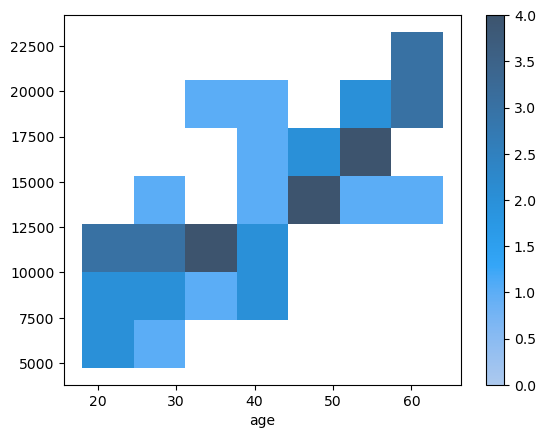

In [97]:
sns.histplot(x=average_charge_respected_to_age.keys(), y=charge_respected_to_age.values, cbar=True)
plt.show()

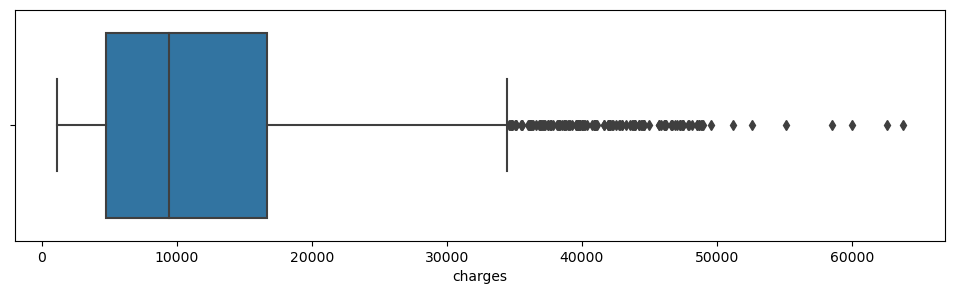

In [101]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=df["charges"])
plt.show()

In [102]:
sns.histplot(df["charges"])

<AxesSubplot:xlabel='charges', ylabel='Count'>

/home/mahyar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


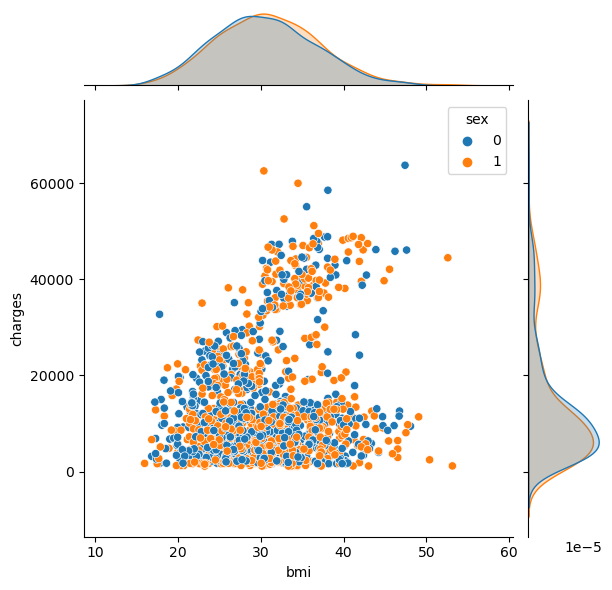

In [108]:
sns.jointplot(df["bmi"], y=df["charges"], hue=df["sex"])
plt.show()

In [132]:
sex_to_smoker = df.groupby("sex")["smoker"].value_counts()

In [131]:
sex_to_smoker

sex  smoker
0    0         547
     1         115
1    0         517
     1         159
Name: smoker, dtype: int64

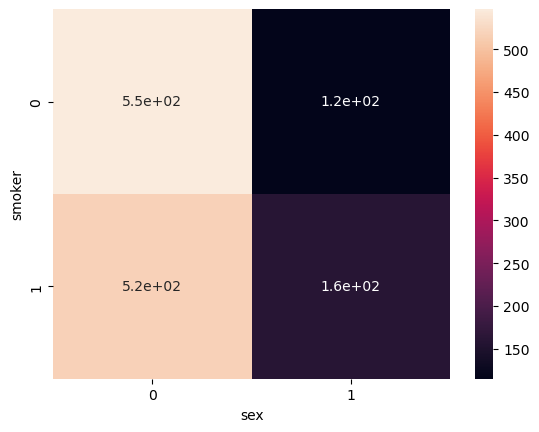

In [133]:
sns.heatmap(sex_to_smoker.values.reshape(2, 2),  annot=True)
plt.xlabel("sex")
plt.ylabel("smoker")
plt.show()

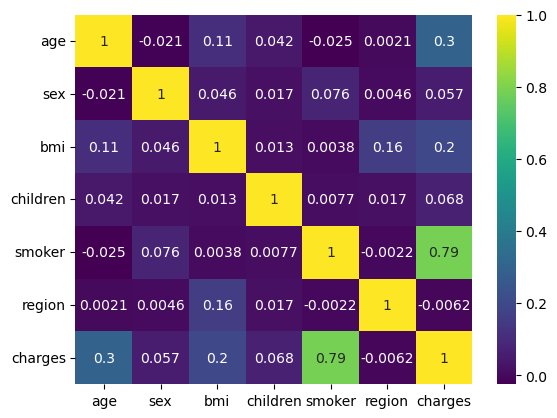

In [136]:
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.show()

correlations are too low to be seperable, so I will use pca to reduce the dimentianlity

In [141]:
y = df["charges"]
x = df.drop(["charges"], axis=1)

In [145]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.9)

In [150]:
categorical_columns = ["sex", "children", "smoker", "region"]

In [151]:
ss = StandardScaler()

In [152]:
xtrain_regressive = xtrain.drop(categorical_columns, axis=1)
xtest_regressive = xtest.drop(categorical_columns, axis=1)

In [164]:
xtrain_standard = pd.DataFrame(ss.fit_transform(xtrain_regressive), columns=xtrain_regressive.columns, index=xtrain_regressive.index)
xtest_standard = pd.DataFrame(ss.fit_transform(xtest_regressive), columns=xtest_regressive.columns, index=xtest_regressive.index)
ytrain_standard = (ytrain - np.mean(ytrain)) / np.var(ytrain)
ytest_standard = (ytest - np.mean(ytest)) / np.var(ytest)

In [165]:
xtrain_final = pd.concat([xtrain_standard, xtrain[categorical_columns]], axis=1)
xtest_final = pd.concat([xtest_standard, xtest[categorical_columns]], axis=1)

In [196]:
pca = PCA(.8)
xtrain_reduced = pca.fit_transform(xtrain_final)

In [197]:
xtrain_reduced.shape, ytrain_standard.shape

((1204, 4), (1204,))

In [199]:
xtest_reduced = pca.transform(xtest_final)

# Function of the models

In [202]:
def Model_Constructor(model ,xtrain ,ytrain ,xtest ,ytest):
    model.fit(xtrain,ytrain)
    train_res = model.predict(xtrain)
    test_res = model.predict(xtest)
    print("MSE train: ", metrics.mean_squared_error(ytrain, train_res))
    print("MSE test: ", metrics.mean_squared_error(ytest, test_res))
    return model

# KNN

In [220]:
knn = KNeighborsRegressor(n_neighbors=10, n_jobs=-1)
model_knn = Model_Constructor(knn, xtrain_reduced, ytrain_standard, xtest_reduced, ytest_standard)

MSE train:  5.4693470309862716e-09
MSE test:  6.398315602146447e-09


In [221]:
for_visualization_knn = model_knn.predict(xtest_reduced[:10])

# Decision Tree

In [222]:
dtc = DecisionTreeRegressor(max_depth=2, max_features=4)
model_dtc = Model_Constructor(dtc, xtrain_reduced, ytrain_standard, xtest_reduced, ytest_standard)

MSE train:  6.088547635150394e-09
MSE test:  5.630745965428689e-09


In [223]:
for_visualization_dtc = model_dtc.predict(xtest_reduced[:10])

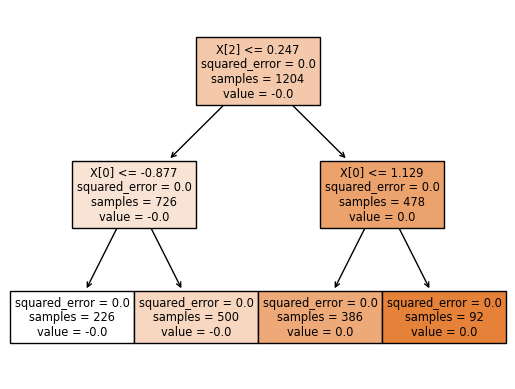

In [231]:
plot_tree(model_dtc, filled=True)
plt.show()

# Random Forest

In [238]:
rfc = RandomForestRegressor(n_estimators=300, max_depth=3, max_features=4)
model_rfc = Model_Constructor(rfc, xtrain_reduced, ytrain_standard, xtest_reduced, ytest_standard)

MSE train:  5.666852195076054e-09
MSE test:  5.4920880813345955e-09


In [239]:
for_visualization_rfc = model_rfc.predict(xtest_reduced[:10])

# Adaboost

In [254]:
adb = AdaBoostRegressor(n_estimators=200)
model_adb = Model_Constructor(adb, xtrain_reduced, ytrain_standard, xtest_reduced, ytest_standard)

MSE train:  7.428440376746829e-09
MSE test:  7.1195873397534865e-09


In [255]:
for_visualization_adb = model_adb.predict(xtest_reduced[:10])

# SVR

In [287]:
svr = SVR(kernel='line')
model_svr = Model_Constructor(svr, xtrain_reduced, ytrain_standard, xtest_reduced, ytest_standard)

MSE train:  2.3921137102676768e-08
MSE test:  2.398168337719296e-08


In [283]:
for_visualization_svr = model_svr.predict(xtest_reduced[:10])

Lets plot the results of the models

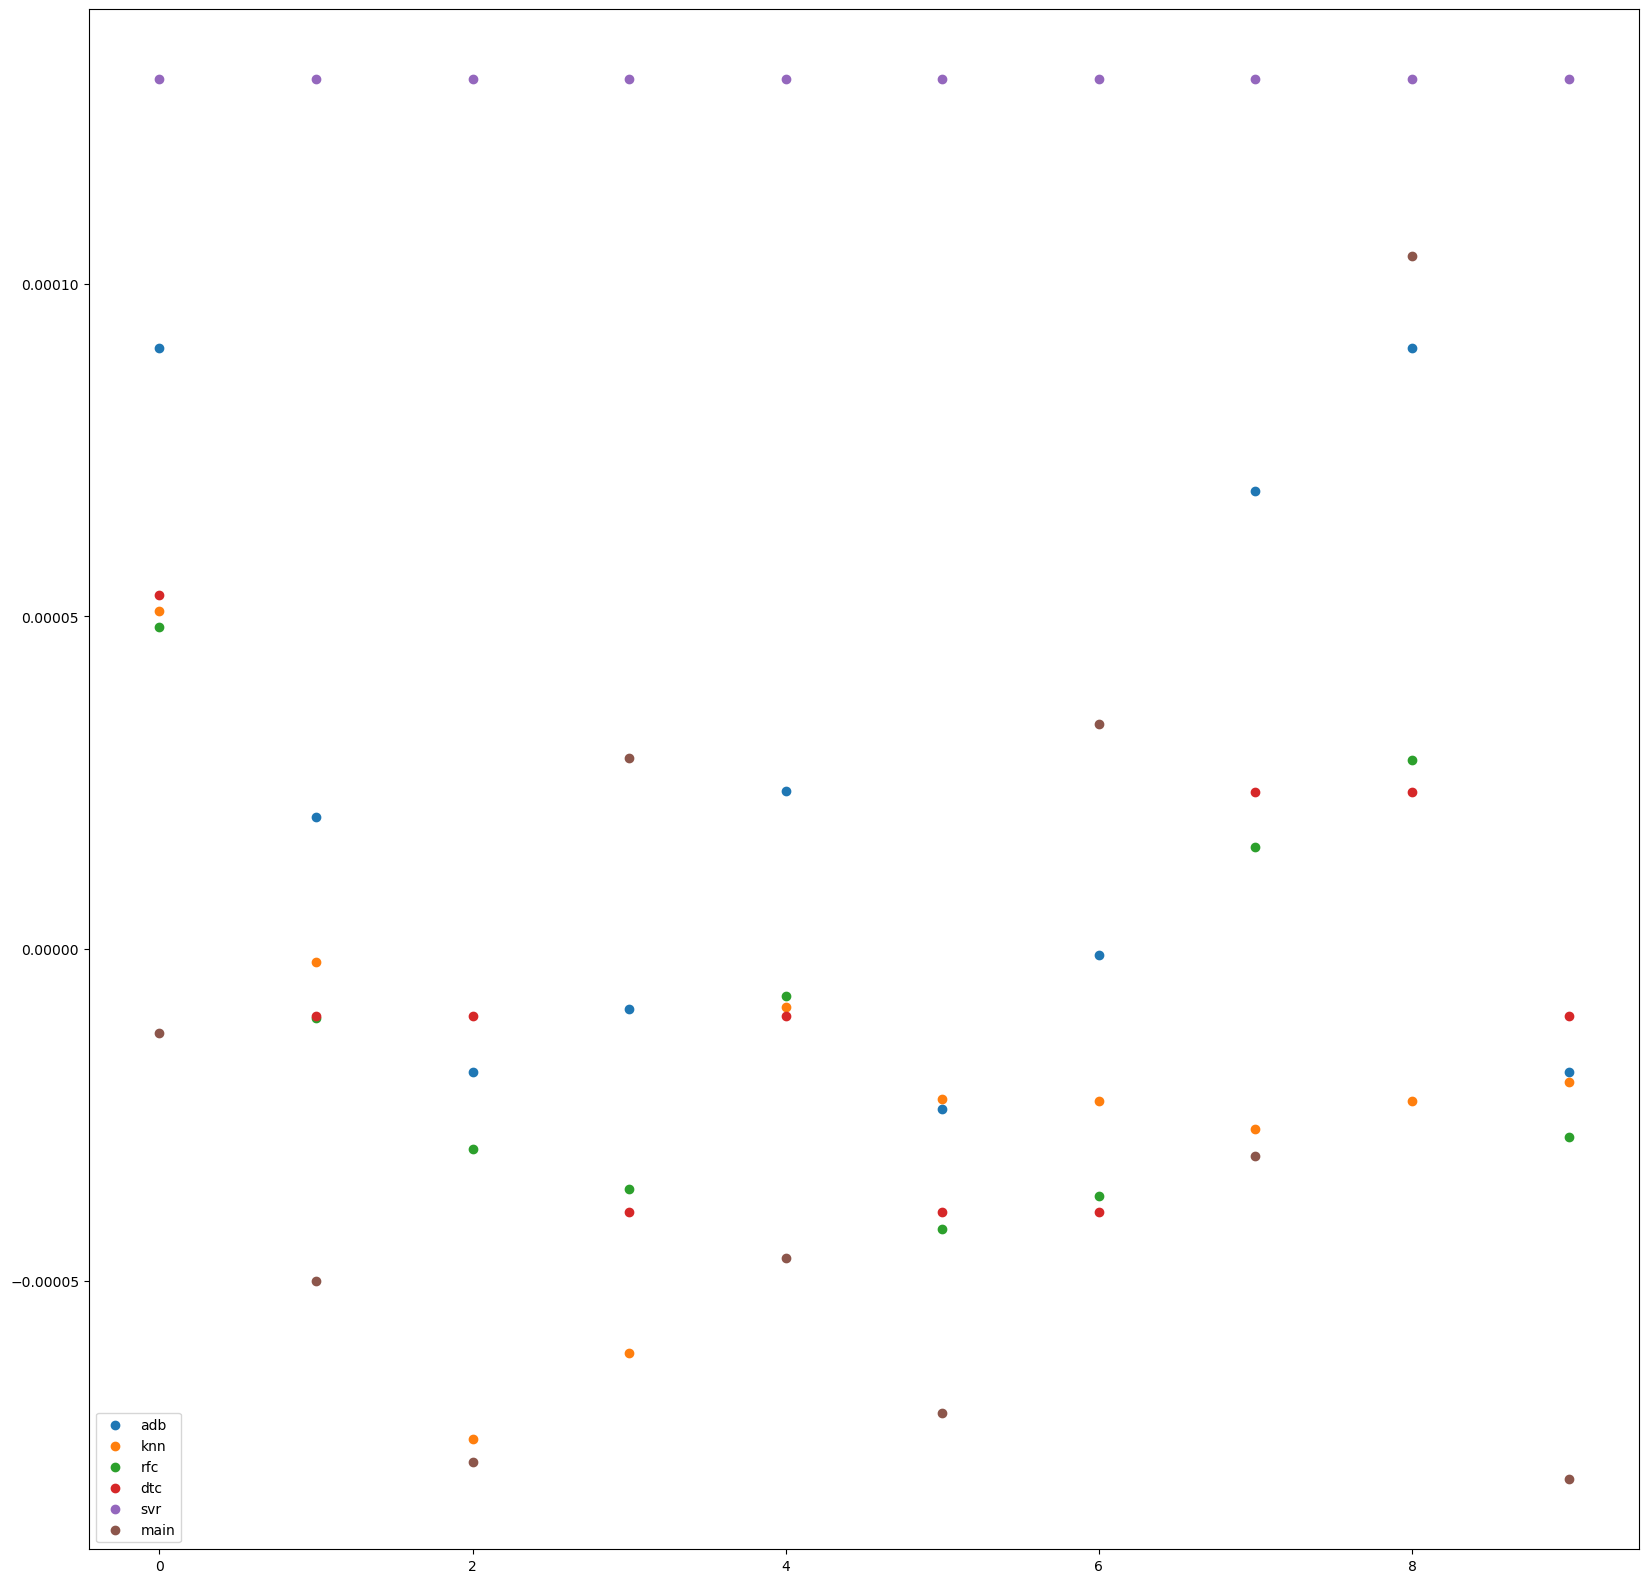

In [284]:
plt.figure(figsize=(20, 20))
plt.scatter(range(10), for_visualization_adb)
plt.scatter(range(10), for_visualization_knn)
plt.scatter(range(10), for_visualization_rfc)
plt.scatter(range(10), for_visualization_dtc)
plt.scatter(range(10), for_visualization_svr)
plt.scatter(range(10), ytest_standard[:10])
plt.legend(["adb", "knn", "rfc", "dtc", "svr", "main"])
plt.show()